In [4]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [7]:
import os

def corpus_to_emails(corpus_path):
    """Returns a dictionary mapping persons a list of the paths of their emails"""
    people = os.listdir(corpus_path)

    people_emails = {}
    for person in people:
        person_path = os.path.join(corpus_path, person)
        person_paths = []
        for (dirpath, dirnames, filenames) in os.walk(person_path):
            person_paths += [ os.path.join(dirpath, filename) for filename in filenames ]
        people_emails[person] = person_paths
    return people_emails

corpus_path = "corpus"
people_emails = corpus_to_emails(corpus_path)

In [20]:
selected_few = [ "allen-p", "arnold-j", "arora-h" ]
people_emails = { person : people_emails[person] for person in selected_few }

In [26]:
from tqdm.auto import tqdm

def email_to_ego(path, nlp):
    """Returns the number of times 'I' and 'you' are used as a 'nsubj', respectively"""
    ises = 0
    youses = 0
    
    with open(path) as f:
        document = nlp(f.read())
        
        for token in document:
            if token.dep_ == 'nsubj' and token.lemma_.lower() == "i" and token.pos_ == "PRON":
                ises += 1
                
                ### every 10th of ises, we print out the sentence to keep us entertained 
                if ises % 10 == 0:
                    print("☝️" + token.sent.text.replace("\n"," ") + "\n")
            if token.dep_ == 'nsubj' and token.lemma_.lower() == "you" and token.pos_ == "PRON":
                youses += 1
                
                if youses % 10 == 0:
                    print("✌️" + token.sent.text.replace("\n"," ") + "\n")
    return ises, youses

def emails_to_egos(people_emails, nlp):
    # Passing the nlp-object we defined above to the function to save time, 
    # so we don't have to create it anew for every email.
    people_egos = {}
    
    for person, emails in people_emails.items():
        
        ises = 0
        youses = 0
        for email in tqdm(emails[:100]):
            ises_, youses_ = email_to_ego(email, nlp)
            ises += ises_
            youses += youses_
        people_egos[person] = { "ises" : ises, "youses" : youses }
    return people_egos
        
people_egos = emails_to_egos(people_emails, nlp)

  0%|          | 0/100 [00:00<?, ?it/s]

✌️You might be the person with the strength, stamina, and general dorkiness to win the World Mouseclicking Competition.

☝️And I'm burnin', I'm burnin', I'm burnin' for you 

✌️Please send your questions and comments to mailto:investor.help@multex.com  If you'd like to learn more about Multex Investor, please visit: 



  0%|          | 0/100 [00:00<?, ?it/s]

☝️I put a restaurant on  a boat."

☝️Lober had a $30,000 monthly overhead in debt service, office rental,  insurance and slip fees, and "I still had to pay it if the boat didn't leave  once," he said.

☝️"I think we're in the political season where people are proposing grandiose  schemes that aren't very well thought out, and this seems to be one of  those," Eachus said.

☝️And the  press corps has been very respectful in the past of treating family matters  with privacy, and I'm certain that you're going to do so again.

✌️Please list all Notes databases applications that you currently use:

✌️You'll know you have placed your order when you reach a screen that  says,  "Thank you for your order.



  0%|          | 0/100 [00:00<?, ?it/s]

✌️http://www.multexinvestor.com/welcome.asp  If you can't remember your password and/or your user name, click here: 

✌️  Choosing a retirement plan for your business or yourself is one of the most  important financial decisions you will make.

✌️Up to 10.75% may be added to the rental rate if you rent at an off-airport location and exit on our shuttle bus.

✌️Now you can send it to a friend with just  a click.

✌️Before you do anything else today, check to see that you have enough coverage to protect your family's financial and education needs.

✌️How can you minimize your tax obligations?

✌️If you need assistance please visit: http://continentalairlines.rsc01.net/servlet/cc4?JHEVAV*oHkhkHQLJmELgkhgEJht*z*VVA



In [27]:
print(people_egos)

{'allen-p': {'ises': 110, 'youses': 225}, 'arnold-j': {'ises': 189, 'youses': 161}, 'arora-h': {'ises': 40, 'youses': 246}}


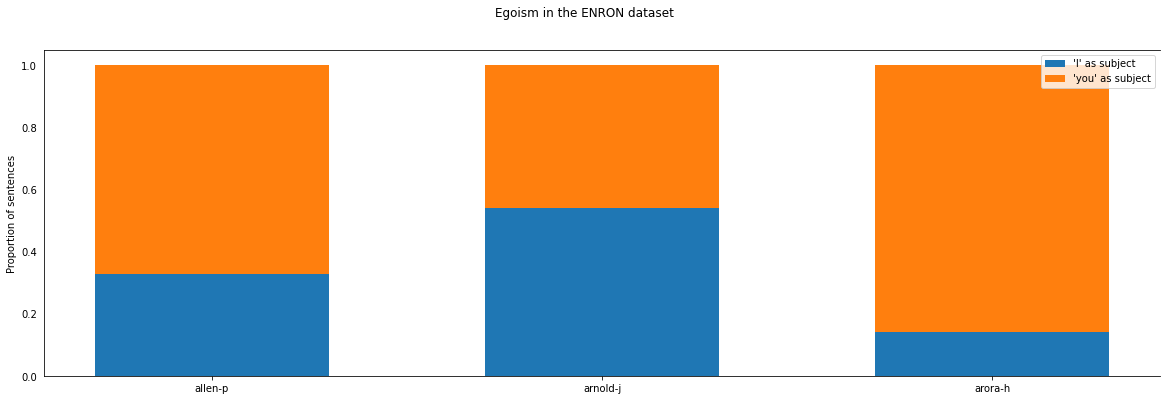

In [29]:
import matplotlib.pyplot as plt

ises = [ people_egos[p]["ises"] for p in people_egos.keys() ]
youses = [ people_egos[p]["youses"] for p in people_egos.keys() ]

total = [ i + y for i, y in zip(ises, youses) ]
ises = [ ises/total[i] for i, ises in enumerate(ises) ]
youses = [ youses/total[i] for i, youses in enumerate(youses) ]

bar_width = 0.6

figure, axes = plt.subplots(1, 1, figsize=(20,6), sharey=True)
axis = axes

figure.suptitle("Egoism in the ENRON dataset")
axis.bar(people_egos.keys(), ises, bar_width, label="'I' as subject")
axis.bar(people_egos.keys(), youses, bar_width, label="'you' as subject", bottom=ises)


axis.set_ylabel("Proportion of sentences")
axis.legend()
axis.tick_params(left=False)

axis.spines['right'].set_visible(False)

plt.show()